In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups (1).csv to 50_Startups (1).csv


In [ ]:
startup=pd.read_csv("50_Startups (1).csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#Checking the null values there or not
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#Checking the statistics of the given data
startup.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


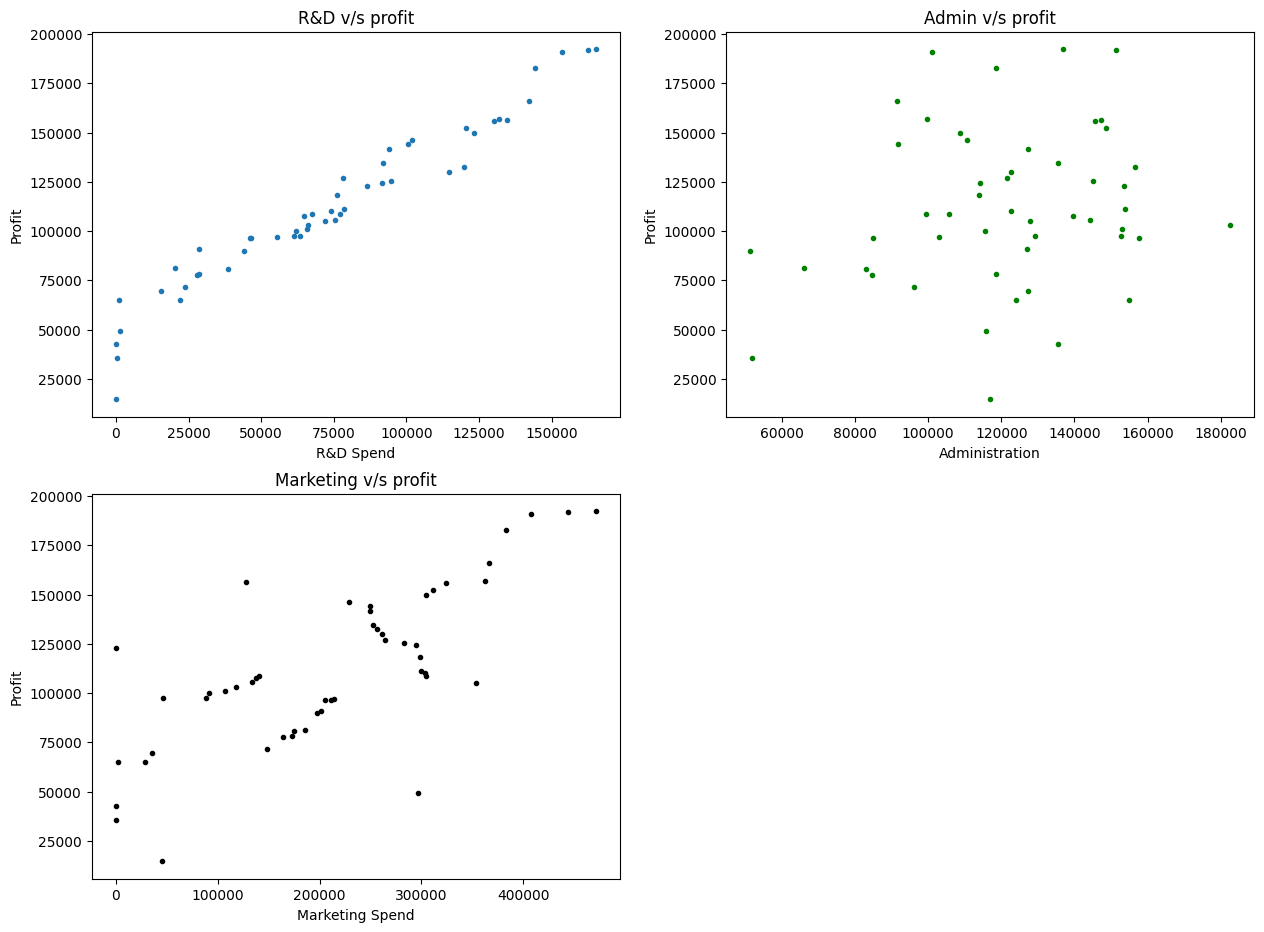

In [ ]:
#Visualizing the data
#visualising numerical columns
# plot1
fig=plt.figure(figsize=(15,11))
ax0=plt.subplot(221)
ax0.plot(startup['R&D Spend'],startup['Profit'],'.')
ax0.set_xlabel('R&D Spend');
ax0.set_ylabel('Profit');
ax0.set_title('R&D v/s profit')
# plot2
ax1=plt.subplot(222)
ax1.plot(startup['Administration'],startup['Profit'],'.',color='green')
ax1.set_xlabel('Administration')
ax1.set_ylabel('Profit');
ax1.set_title('Admin v/s profit')
#plot3
ax2=plt.subplot(223)
ax2.plot(startup['Marketing Spend'],startup['Profit'],'.',color='black')
ax2.set_xlabel('Marketing Spend')
ax2.set_ylabel('Profit');
ax2.set_title('Marketing v/s profit')
plt.show();

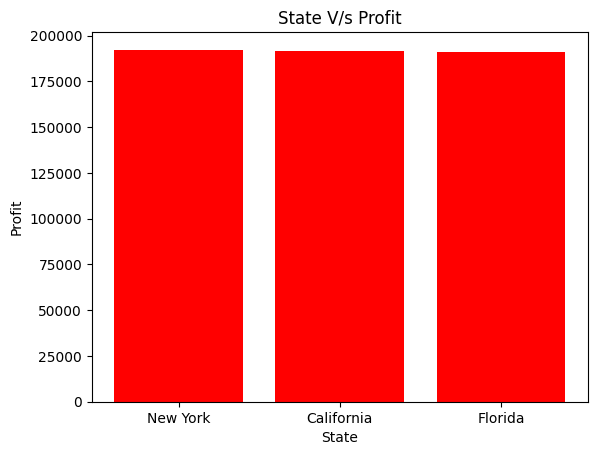

In [ ]:
#visualising the Categorical column
plt.bar(startup['State'],startup['Profit'],color='red')
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("State V/s Profit")
plt.show()

In [ ]:
#we can do  one hot encoding to convert the categorical value to the Numerical value or we can simply drop the column i testing the data

In [ ]:
# Splitting the data into X and y
from sklearn.model_selection import train_test_split

In [ ]:
X=startup.iloc[:,:3].values
y=startup['Profit'].values

In [ ]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
#checking the shape
print('X:',X.shape)
print('y:',y.shape)

X: (50, 3)
y: (50,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Testing the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting a single value
model.predict([[165349.20,136897.80,471784.10]])


array([190318.42240258])

In [ ]:
#predicting multiple values
#1. On train data
y_pred_train=model.predict(X_train)
#2. On test data
y_pred_test=model.predict(X_test)

In [ ]:
y_pred_test=model.predict(X_train)

In [ ]:
# Checking the Acuuracy
acc=model.score(X_test,y_test)
print("Accuracy",acc*100)

Accuracy 96.50940934427325


In [ ]:
#checking the error from sklearn.metrics
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("Mean Square Error:",mse)


Mean Square Error: 8899.174159891018


In [ ]:
# Checking the Coefficients and Intercepts

print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)


Coefficient: [ 0.7742023  -0.00877164  0.02934891]
Intercept: 49659.157733186345


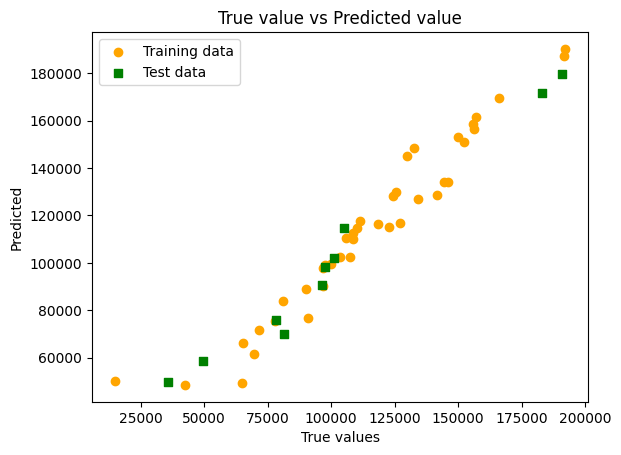

In [ ]:
#visualizing the model trained
plt.scatter(y_train ,y_pred_train,c='Orange',marker='o',label='Training data')
plt.scatter(y_test,y_pred_test,c='green',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show();